In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizing Single Image of Test Set

<function matplotlib.pyplot.show(close=None, block=None)>

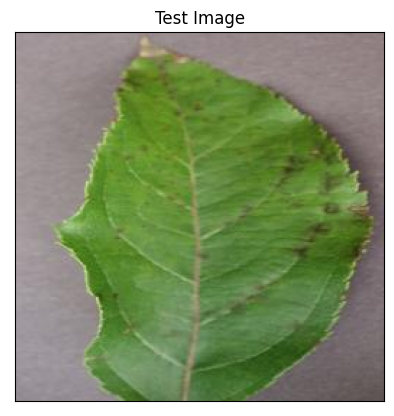

In [26]:
import cv2
image_path ="new-plant-diseases-dataset/test/AppleScab1.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show

### Testing Model

In [27]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [28]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 181ms/step


(array([[9.9994588e-01, 1.4395755e-12, 1.9348748e-08, 5.8474264e-08,
         1.1324623e-12, 5.1803001e-10, 1.8449744e-09, 6.2573981e-11,
         9.5989085e-15, 1.3004521e-11, 9.4657179e-14, 9.1776575e-10,
         6.9476960e-13, 1.0754664e-09, 1.0181360e-05, 2.2374802e-06,
         9.7176826e-07, 7.2088928e-13, 6.0906332e-12, 3.5871621e-09,
         1.6055528e-15, 1.6685918e-10, 9.9963104e-09, 8.6275952e-11,
         4.7672671e-10, 3.7245347e-05, 4.3747073e-10, 6.7623934e-10,
         1.8993542e-06, 4.7997228e-09, 3.8922032e-08, 4.7722429e-14,
         8.7772355e-07, 1.5615942e-10, 9.6539006e-11, 6.3491348e-07,
         1.0450602e-11, 1.4887300e-08]], dtype=float32),
 (1, 38))

In [29]:
result_index = np.argmax(prediction)
result_index

0

In [30]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

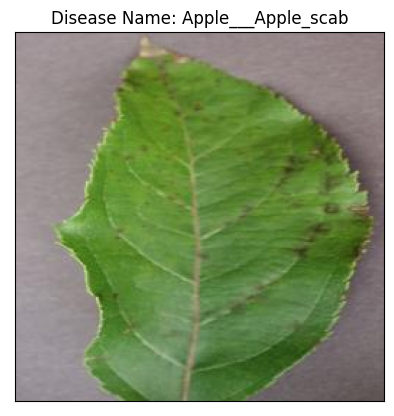

In [31]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
model_prediction

'Apple___Apple_scab'